In [59]:
# Do not delete this cell. It ensures that you can do the imports,
# load datasets etc. in the same fashion as in any Python script
# in the project template.


import sys
sys.path.insert(0, '../..')
from bld.project_paths import project_paths_join as ppj
from bld.project_paths import project_paths as pp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 20})
rc('text', usetex=True)


In [60]:
import pandas as pd
%config Completer.use_jedi = False


In [83]:
data_cluster_1H1A = pd.read_pickle(ppj('OUT_ANALYSIS', 'data_individual_with_types_1H1A.pickle'))
data_cluster_1H2A = pd.read_pickle(ppj('OUT_ANALYSIS', 'data_individual_with_types_1H2A.pickle'))

# Share of participants that can be attributed to a specific type

In [62]:
a = data_cluster_1H1A.groupby(['strategy_type'], as_index=True)[['participant.code']].nunique() / len(set(data_cluster_1H1A['participant.code']))

In [63]:
a.to_dict()

{'participant.code': {0: 0.59375, 1: 0.3125, 2: 0.09375}}

In [64]:
eval(a.to_json())

{'participant.code': {'0': 0.59375, '1': 0.3125, '2': 0.09375}}

In [65]:
data_cluster_1H2A.groupby(['strategy_type'], as_index=True)[['participant.code']].nunique() / len(set(data_cluster_1H2A['participant.code']))

,participant.code
strategy_type,
0,0.476190
1,0.285714
2,0.238095


Graph that plots the types for the last super game

In [66]:
def make_line_plot(data_1H1A, data_1H2A, all_types):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
    plt.subplots_adjust(wspace=0.02)
    
    # Hand picked colors
    all_colors = sns.color_palette('colorblind')
    
    # all treatments of interest 
    all_treatments = ['1H1A', '1H2A']
    
    # Hand picked markers and dashes
    all_markers = ["v", "s", "P", "X", "d"]
    
    # Make line plots
    for ix_data, data in enumerate([data_1H1A, data_cluster_1H2A]):
        for ix_type, current_type in enumerate(all_types):
            if ix_data == 0:
                sns.lineplot(x='round',
                             y='winning_price',
                             data=data.loc[data['strategy_type'] == current_type],
                             ax=axes[ix_data],
                             color=all_colors[ix_type],
                             ci=None,
                             marker=all_markers[ix_type],
                             markersize=9,
                             label=f"Type {current_type}")
            else:
                sns.lineplot(x='round',
                             y='winning_price',
                             data=data.loc[data['strategy_type'] == current_type],
                             ax=axes[ix_data],
                             color=all_colors[ix_type],
                             ci=None,
                             marker=all_markers[ix_type],
                             markersize=9)


        axes[ix_data].set_xticks([i for i in range(5, 11 + 1, 5)])
        axes[ix_data].set_xlabel('Round')
        axes[ix_data].set_ylabel('')
        axes[ix_data].set_title(f'{all_treatments[ix_data]}')

        # Increase xtick label size
        axes[ix_data].tick_params(axis='both', which='major', labelsize=20)

    # Scale of axis
    for axis_index in range(2):
        axes[axis_index].set_ylim([0, 5.5])
        axes[axis_index].set_yticks(range(0, 6, 1))

        if axis_index != 0:
            axes[axis_index].set_yticklabels([])

        # Add line for monopoly price and stage game nash equilibrium
        axes[axis_index].hlines(
            1,
            xmax=11,
            xmin=1,
            label='Nash equilibrium',
            colors='gray')
        axes[axis_index].hlines(
            4,
            xmax=11,
            xmin=1,
            label='Monopoly price',
            colors='black')
    
    # Add ylabel
    axes[0].set_ylabel('Market price')
    
    # Add legend
    axes[0].legend(
        loc='lower center', bbox_to_anchor=(
            1.1, -0.28), ncol=3, fontsize=20)
     
    # Save the figure
    fig.savefig(ppj("OUT_FIGURES", f"line_plot_type_classification.pdf"),
                bbox_inches='tight')


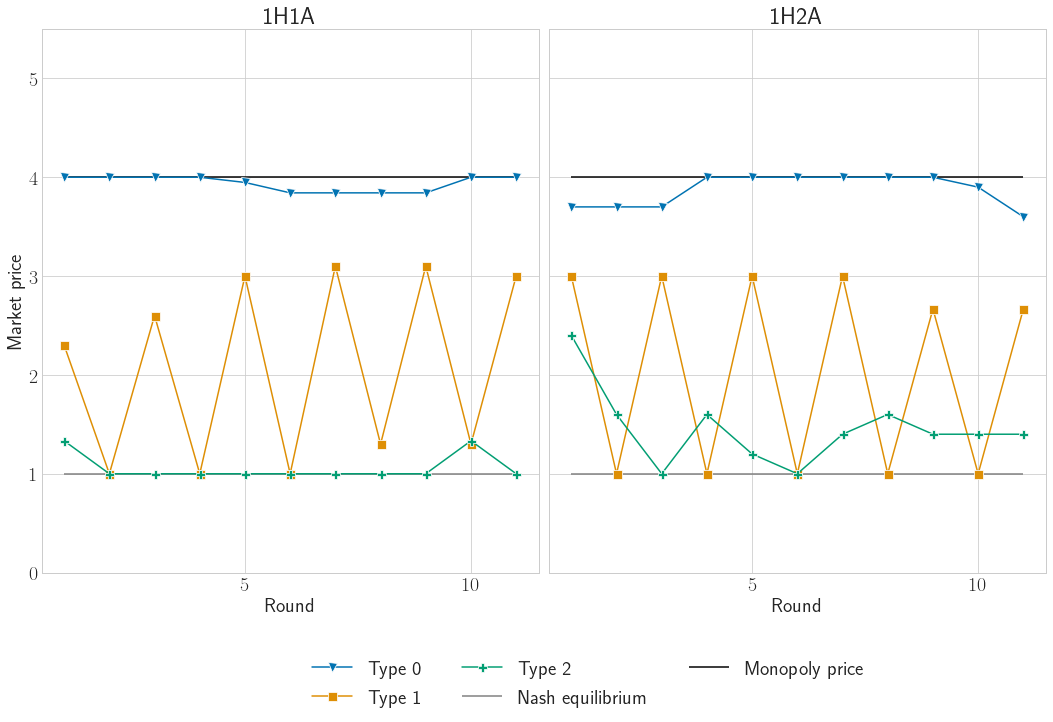

In [67]:
make_line_plot(data_1H1A=data_cluster_1H1A,
               data_1H2A=data_cluster_1H2A,
               all_types=[0,1,2])

# Testing for treatment effect if we subset the groups

In [68]:
data_group_level = pd.read_pickle(ppj('OUT_DATA', 'data_group_level.pickle'))

# GEt the data for 2H0A
data_2H0A_last_sg = data_group_level.loc[(data_group_level['treatment'] == '2H0A') &
                                         (data_group_level['super_game'] == 3)]

data_independent_observations_2H0A = data_2H0A_last_sg.groupby(['super_group_id_general'])['winning_price'].mean().values

# Get the data for 3H0A
data_3H0A_last_sg = data_group_level.loc[(data_group_level['treatment'] == '3H0A') &
                                         (data_group_level['super_game'] == 3)]

data_independent_observations_3H0A = data_3H0A_last_sg.groupby(['super_group_id_general'])['winning_price'].mean().values

In [81]:
data_independent_observations_3H0A

array([1.3030303 , 3.06060606, 2.15151515, 1.93939394, 2.45454545,
       3.93939394, 1.96969697])

Lets first test for differences in 1H1A vs fully human market.

In [69]:
# Split the data based on the type 0 (cooperative type)
data_not_type_0_1H1A, data_type_0_1H1A = [x for _, x in data_cluster_1H1A.groupby(data_cluster_1H1A['strategy_type'] == 0)]

In [70]:
data_type_0_1H1A.groupby(['participant.code'])['winning_price'].mean().values

array([2.81818182, 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        ])

In [71]:
# As this treatment is individual choice, I can groupy by participant.code
data_independent_observatios_type_0_1H1A = data_type_0_1H1A.groupby(['participant.code'])['winning_price'].mean().values
data_independent_observatios_not_type_0_1H1A = data_not_type_0_1H1A.groupby(['participant.code'])['winning_price'].mean().values

In [72]:
from scipy.stats import mannwhitneyu, ttest_ind

In [73]:
mannwhitneyu(
    data_independent_observatios_type_0_1H1A,
    data_independent_observations_2H0A,
    use_continuity=False,
    alternative='two-sided'
)[-1]

1.9122060479581403e-05

In [74]:
mannwhitneyu(
    data_independent_observatios_not_type_0_1H1A,
    data_independent_observations_2H0A,
    use_continuity=False,
    alternative='two-sided'
)

MannwhitneyuResult(statistic=21.0, pvalue=0.006024195704062682)

Next 1H2A v fully human market

In [92]:
# Split the data based on the type 0 (cooperative type)
data_not_type_0_1H2A, data_type_0_1H2A = [x for _, x in data_cluster_1H2A.groupby(data_cluster_1H2A['strategy_type'] == 0)]

In [93]:
# As this treatment is individual choice, I can groupy by participant.code
data_independent_observatios_type_0_1H2A = data_type_0_1H2A.groupby(['participant.code'])['winning_price'].mean().values
data_independent_observatios_not_type_0_1H2A = data_not_type_0_1H2A.groupby(['participant.code'])['winning_price'].mean().values

In [94]:
len(data_independent_observatios_not_type_0_1H2A)

11

In [95]:
len(data_independent_observatios_type_0_1H2A)

10

In [96]:
data_independent_observations_3H0A

array([1.3030303 , 3.06060606, 2.15151515, 1.93939394, 2.45454545,
       3.93939394, 1.96969697])

In [97]:
mannwhitneyu(
    data_independent_observatios_type_0_1H2A,
    data_independent_observations_3H0A,
    use_continuity=False,
    alternative='two-sided'
)

MannwhitneyuResult(statistic=67.0, pvalue=0.0012126454136237783)

In [98]:
mannwhitneyu(
    data_independent_observatios_not_type_0_1H2A,
    data_independent_observations_3H0A,
    use_continuity=False,
    alternative='two-sided'
)

MannwhitneyuResult(statistic=20.0, pvalue=0.09027677038420827)